In [3]:
#Instalar las dependencias necesarias
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy

# **Análisis de Rendimiento Estudiantil: Pasos Seguidos**
Este análisis está diseñado para comprender mejor los factores que afectan el rendimiento estudiantil a partir de un dataset preprocesado llamado Cleaned_Students_Performance.csv. Los pasos seguidos son:

1. **Carga de Datos:** Leer el dataset y obtener una vista preliminar de su contenido.

2. **Exploración Básica de Datos:** Identificar valores faltantes, verificar la estructura y calcular estadísticas descriptivas.

3. **Análisis Exploratorio de Datos (EDA):** Visualizar las relaciones entre las calificaciones y diversas variables categóricas como género, nivel educativo de los padres, tipo de almuerzo y participación en cursos de preparación.

4. **Análisis de Correlación:** Evaluar las relaciones numéricas entre las calificaciones de matemáticas, lectura y escritura utilizando una matriz de correlación.

5. **Análisis Estadístico:** Realizar pruebas estadísticas como T-Test y ANOVA para comparar grupos y analizar diferencias significativas.

Primeras filas del dataset:
   gender race_ethnicity parental_level_of_education  lunch  \
0       0        group B           bachelor's degree      1   
1       0        group C                some college      1   
2       0        group B             master's degree      1   
3       1        group A          associate's degree      0   
4       1        group C                some college      1   

   test_preparation_course  math_score  reading_score  writing_score  \
0                        0          72             72             74   
1                        1          69             90             88   
2                        0          90             95             93   
3                        0          47             57             44   
4                        0          76             78             75   

   total_score  average_score  
0          218      72.666667  
1          247      82.333333  
2          278      92.666667  
3          148      49.333333  


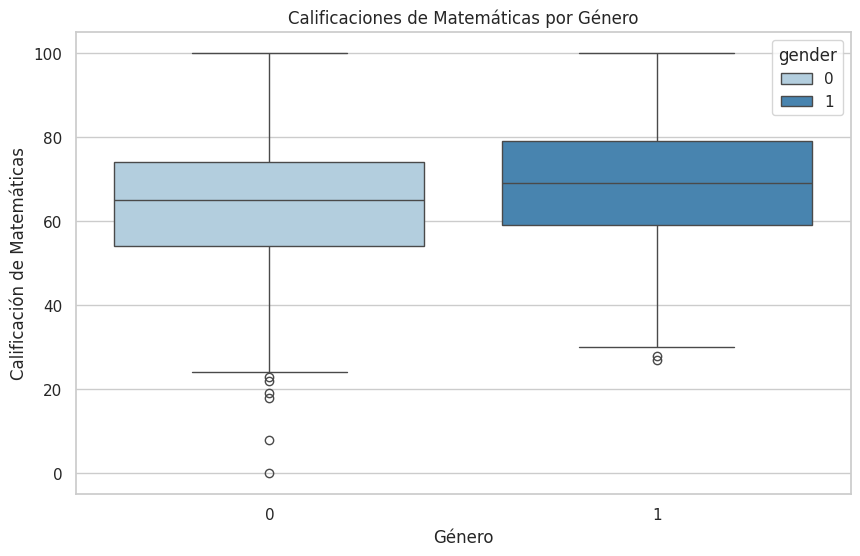

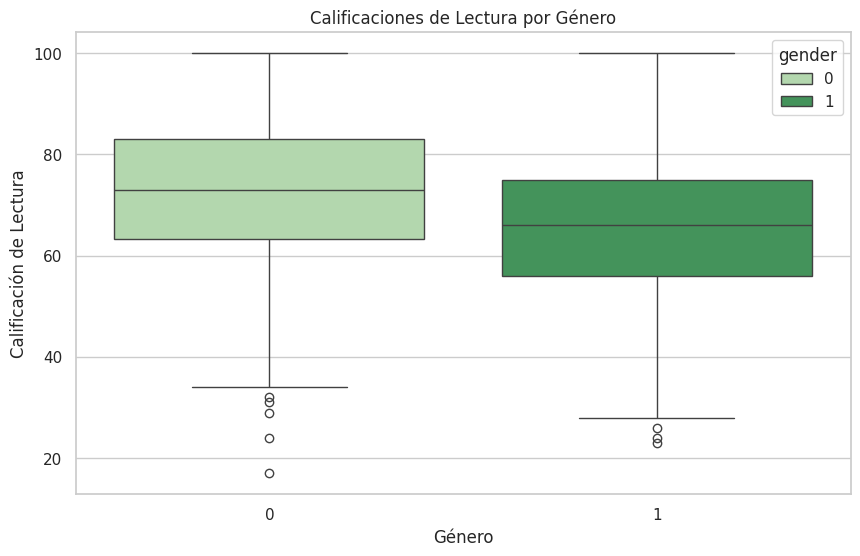

<ipython-input-13-b0353756c848>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parental_level_of_education',


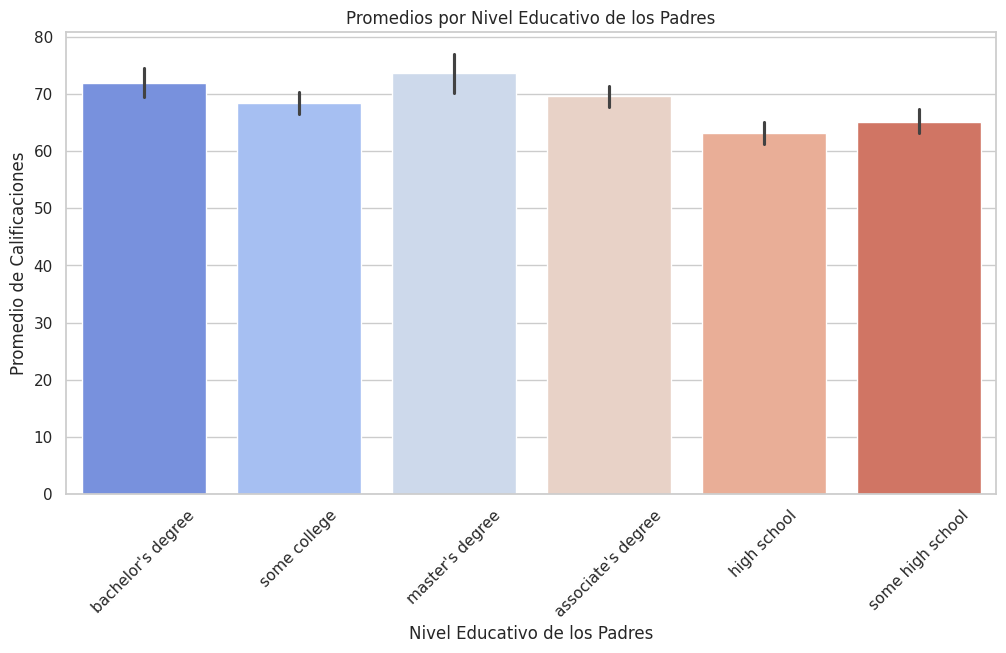

Columnas disponibles en el DataFrame:
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')


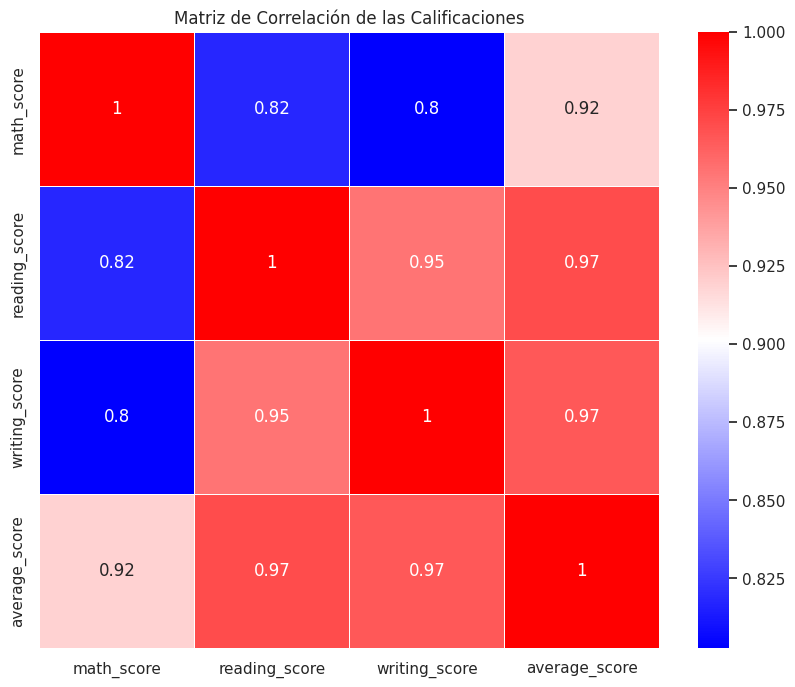


T-test: T-statistic = nan, P-value = nan

ANOVA: F-statistic = 10.75314696233657, P-value = 4.3810464809431664e-10


In [13]:
# Importar las bibliotecas necesarias para análisis y visualización de datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ===========================
# 1. Cargar el Dataset
# ===========================

# Leer el dataset desde un archivo CSV
df = pd.read_csv("Cleaned_Students_Performance.csv")

# Mostrar una vista preliminar del dataset para entender su estructura y contenido
print("Primeras filas del dataset:")
print(df.head())

# ===========================
# 2. Exploración Básica de Datos
# ===========================

# Identificar si existen valores faltantes en cada columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Visualizar la estructura general del dataset (tipos de datos, no. de filas y columnas)
print("\nInformación del dataset:")
df.info()

# Calcular estadísticas descriptivas para columnas numéricas (promedio, mediana, etc.)
print("\nEstadísticas descriptivas:")
print(df.describe())

# ===========================
# 3. Análisis Exploratorio de Datos (EDA)
# ===========================

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# ---------------------------
# Distribución de Calificaciones de Matemáticas por Género
# ---------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='math_score', data=df, palette="Blues", hue="gender")
plt.title('Calificaciones de Matemáticas por Género')
plt.xlabel('Género')
plt.ylabel('Calificación de Matemáticas')
plt.show()

# ---------------------------
# Distribución de Calificaciones de Lectura por Género
# ---------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='reading_score', data=df, palette="Greens", hue="gender")
plt.title('Calificaciones de Lectura por Género')
plt.xlabel('Género')
plt.ylabel('Calificación de Lectura')
plt.show()

# ---------------------------
# Promedios de Calificaciones por Nivel Educativo de los Padres
# ---------------------------
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

plt.figure(figsize=(12, 6))
sns.barplot(x='parental_level_of_education',
            y='average_score',
            data=df,
            palette="coolwarm",
            dodge=False)
plt.title('Promedios por Nivel Educativo de los Padres')
plt.xlabel('Nivel Educativo de los Padres')
plt.ylabel('Promedio de Calificaciones')
plt.xticks(rotation=45)
plt.show()

# ===========================
# 4. Análisis de Correlación
# ===========================

# Verificar las columnas del dataset para seleccionar las relevantes
print("Columnas disponibles en el DataFrame:")
print(df.columns)

# Calcular la matriz de correlación entre las calificaciones
correlation_matrix = df[['math_score', 'reading_score', 'writing_score', 'average_score']].corr()

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='bwr', linewidths=0.5)
plt.title('Matriz de Correlación de las Calificaciones')
plt.show()

# ===========================
# 5. Análisis Estadístico
# ===========================

# ---------------------------
# T-Test: Comparación de Calificaciones de Matemáticas por Género
# ---------------------------
# Dividir las calificaciones de matemáticas según género
male_math_scores = df[df['gender'] == 'male']['math_score']
female_math_scores = df[df['gender'] == 'female']['math_score']

# Realizar un T-Test para verificar diferencias significativas
t_statistic, p_value = stats.ttest_ind(male_math_scores, female_math_scores)
print(f"\nT-test: T-statistic = {t_statistic}, P-value = {p_value}")

# ---------------------------
# ANOVA: Comparación de Promedios por Nivel Educativo de los Padres
# ---------------------------
anova_result = stats.f_oneway(
    df[df['parental_level_of_education'] == "high school"]['average_score'],
    df[df['parental_level_of_education'] == "associate's degree"]['average_score'],
    df[df['parental_level_of_education'] == "bachelor's degree"]['average_score'],
    df[df['parental_level_of_education'] == "master's degree"]['average_score'],
    df[df['parental_level_of_education'] == "some college"]['average_score'],
    df[df['parental_level_of_education'] == "some high school"]['average_score']
)

print(f"\nANOVA: F-statistic = {anova_result.statistic}, P-value = {anova_result.pvalue}")


Explicación de **sns.boxplot** y **sns.heatmap**
**sns.boxplot**

Este gráfico muestra la distribución de datos por categorías, resaltando valores como la mediana, el rango intercuartil y posibles valores atípicos. Argumentos importantes:

* x: Variable categórica en el eje X.
* y: Variable numérica en el eje Y.
* data: DataFrame donde se encuentran las variables.
* hue: Agrupación adicional basada en una categoría.
* palette: Esquema de colores.

**sns.heatmap**
Este gráfico representa una matriz de datos en forma de mapa de calor, ideal para matrices de correlación. Argumentos relevantes:

* data: Matriz (como DataFrame) a graficar.
* annot: Muestra los valores numéricos dentro de las celdas.
* cmap: Paleta de colores para la intensidad del calor.
* linewidths: Grosor de las líneas que separan las celdas.